In [1]:
print('Start import')
import socket 
import strax
import straxen
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import datetime
import pandas as pd
from datetime import datetime
print(
f'''Working on {socket.getfqdn()} with the following versions 
and installation paths:
strax
\tv{strax.__version__}\t{str(strax.__path__[0])}
straxen
\tv{straxen.__version__}\t{str(straxen.__path__[0])}
''')
from multihist import Hist1d, Histdd
import time
import itertools
import os

from scipy import stats
from straxen import units
from scipy.optimize import curve_fit

import drift_diffusion_utility as ddu
import peaks_utility as psu
import glob
from PIL import Image

Start import
Working on midway2-0411.rcc.local with the following versions 
and installation paths:
strax
	v0.15.0	/dali/lgrandi/strax/strax/strax
straxen
	v0.18.1	/dali/lgrandi/strax/straxen/straxen



In [2]:
st = straxen.contexts.xenonnt_online()

In [114]:
def plot_area_width_aft(run_id, low = 0, high = 7, low2 = 0, high2 = 1, binning = 500,
                       a1_b=(1e2,1e3),a2_b=(2e3,2e4),
                       aft1_b=(0.03,0.65),aft2_b=(0.65,0.77),
                       w1_b=(50,1e3), w2_b=(2e3,2e4),plot=False):
    events = st.get_array(run_id,'event_info',progress_bar=False)
    ph_s1 = Histdd(events['s1_area'], events['s1_range_50p_area'],
                    bins=(np.logspace(low, high, binning), np.logspace(1, 6, binning)))
    ph_s2 = Histdd(events['s2_area'], events['s2_range_50p_area'],
                    bins=(np.logspace(low, high, binning), np.logspace(1, 6, binning)))
    phcs1 = Histdd(events['s1_area'], events['s1_area_fraction_top'],
                    bins=(np.logspace(low, high, binning), np.linspace(0, 1, binning)))
    phcs2 = Histdd(events['s2_area'], events['s2_area_fraction_top'],
                    bins=(np.logspace(low, high, binning), np.linspace(0, 1, binning)))
    mask = (events['s1_area']>a1_b[0]) & (events['s1_area']<a1_b[1]) & (events['s2_area']>a2_b[0]) & (events['s2_area']<a2_b[1])
    livetime = (events['time'][len(events)-1]-events['time'][0])/1e9
    rate = len(events[mask])/livetime
    irate, itime = [], []
    for i in range(10):
        idx1, idx2 = int(i*(len(events)-1)/10), int((i+1)*(len(events)-1)/10)
        ltime = (events['time'][idx2]-events['time'][idx1])/1e9
        trange = (events['time']>events['time'][idx1]) & (events['time']<events['time'][idx2])
        irate = np.append(irate,len(events[mask & trange])/ltime)
        timestamp = events['time'][idx1]/1e9
        itime = np.append(itime,datetime.fromtimestamp(timestamp))
        #itime[i] = 
    if plot:
        plt.figure(figsize=(12,6))
        ph_s1.plot(log_scale=True, cblabel='S1 events',cmap='plasma')
        ph_s2.plot(log_scale=True, cblabel='S2 events')
        plt.xlabel("peak area (PE)", ha='right', x=1)
        plt.ylabel("peak width 50% (ns)", ha='right', y=1)
        plt.title(f'run {run_id}')
        plt.xscale('log')
        plt.yscale('log')
        psu.rectangle(a1_b,w1_b,'r')
        psu.rectangle(a2_b,w2_b,'b')
        
        plt.figure(figsize=(12,6))
        ph_s1s2 = Histdd(events['s1_area'], events['s2_area'],
                        bins=(np.logspace(0, 5, binning), np.logspace(1, 7, binning)))
        ph_s1s2.plot(log_scale=True, cblabel='S2 events')
        plt.xlabel("S1 peak area (PE)", ha='right', x=1)
        plt.ylabel("S2 peak area (PE)", ha='right', y=1)
        plt.title(f'run {run_id}')
        plt.xscale('log')
        plt.yscale('log')
        psu.rectangle(a1_b,a2_b,'r')
    
    plt.figure(figsize=(12,6))
    phcs1.plot(log_scale=True, cblabel='S1 events',cmap='plasma')
    phcs2.plot(log_scale=True, cblabel='S2 events')
    plt.xlabel("peak area (PE)", ha='right', x=1)
    plt.ylabel("area fraction top", ha='right', y=1)
    plt.title(f'run {run_id}')
    plt.xscale('log')
    psu.rectangle(a1_b,aft1_b,'r')
    psu.rectangle(a2_b,aft2_b,'b')
    plt.title(f'{run_id} - Kr-rate: {rate:.2f} Hz')
    plt.savefig(f'area_vs_aft_run{run_id}.png')
    
    print(f'run {run_id}, livetime {livetime:.2f} s, Kr-rate: {rate:.2f} Hz')
    return rate, irate, itime

run 012245, livetime 1800.15 s, Kr-rate: 93.47 Hz


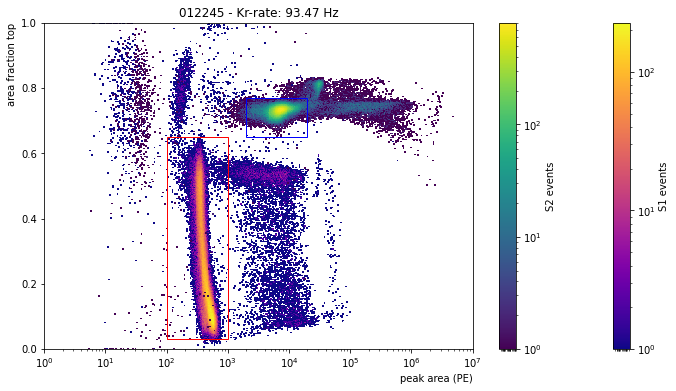

In [115]:
r, rr, tt = plot_area_width_aft('012245')

run 017629, livetime 1801.31 s, Kr-rate: 5.70 Hz


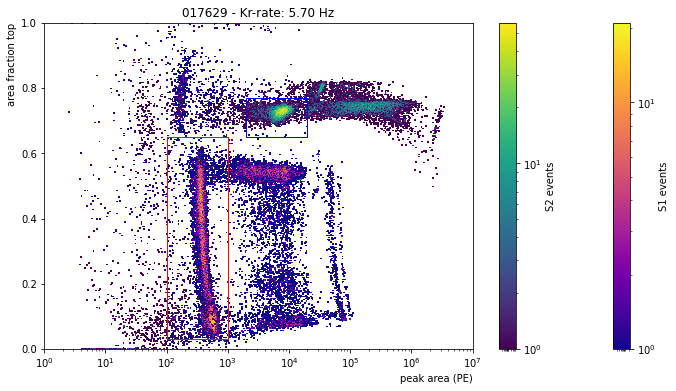

In [142]:
r, rr, tt = plot_area_width_aft('017629')

run 017604, livetime 1801.61 s, Kr-rate: 0.05 Hz
run 017606, livetime 1800.02 s, Kr-rate: 0.10 Hz
run 017607, livetime 1801.50 s, Kr-rate: 0.26 Hz
run 017609, livetime 1801.89 s, Kr-rate: 0.57 Hz
run 017610, livetime 1801.85 s, Kr-rate: 1.06 Hz
run 017612, livetime 1800.09 s, Kr-rate: 1.66 Hz
run 017616, livetime 1800.53 s, Kr-rate: 2.42 Hz
run 017621, livetime 1802.83 s, Kr-rate: 3.24 Hz
run 017623, livetime 1800.82 s, Kr-rate: 4.13 Hz
run 017624, livetime 1800.93 s, Kr-rate: 5.08 Hz
run 017629, livetime 1801.31 s, Kr-rate: 5.70 Hz
run 017637, livetime 1800.74 s, Kr-rate: 6.95 Hz


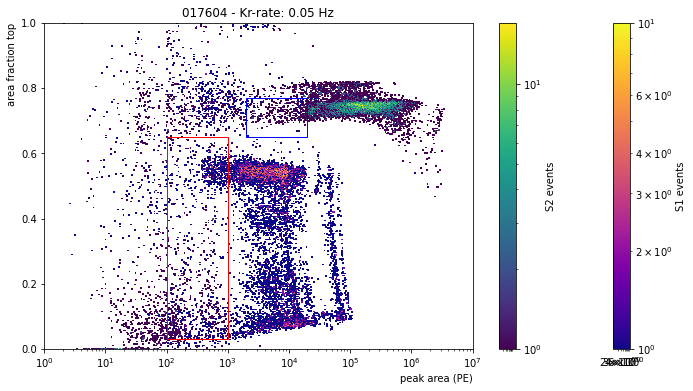

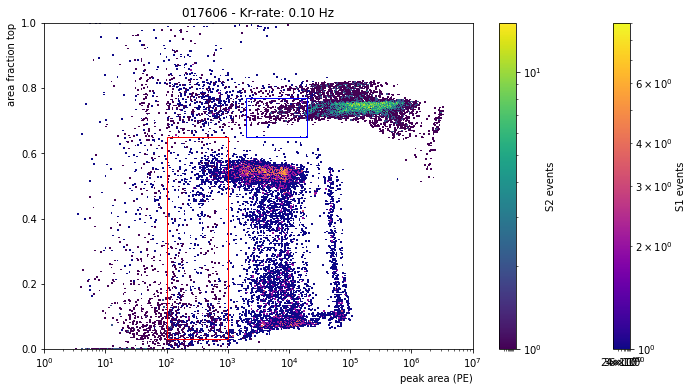

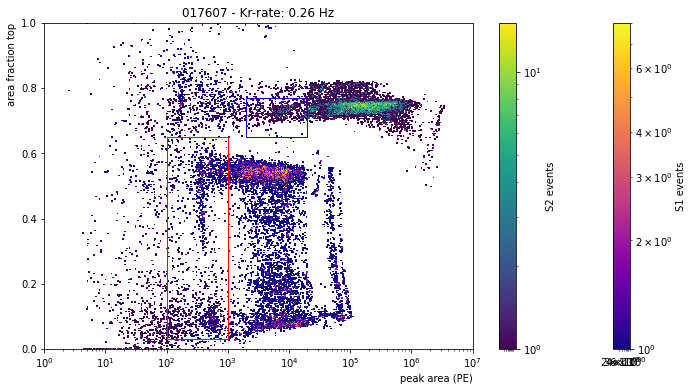

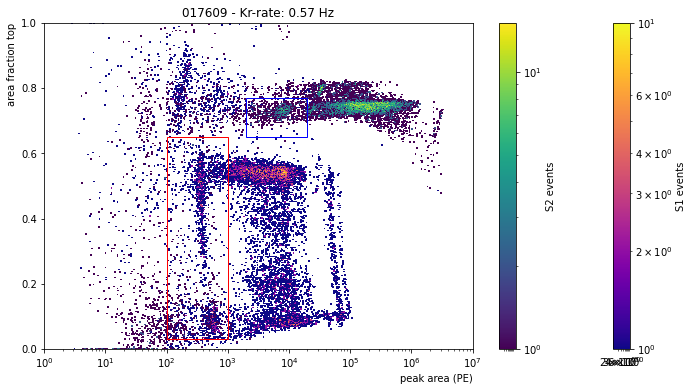

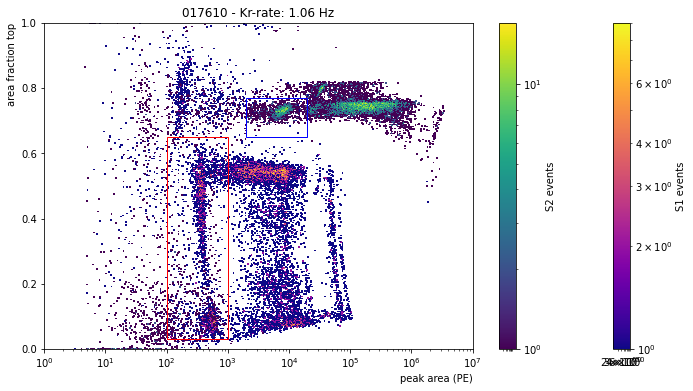

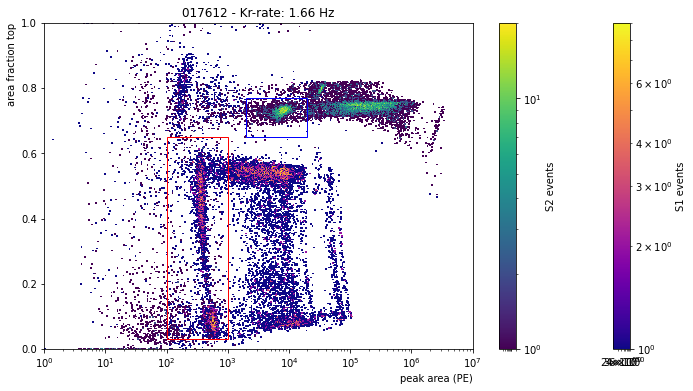

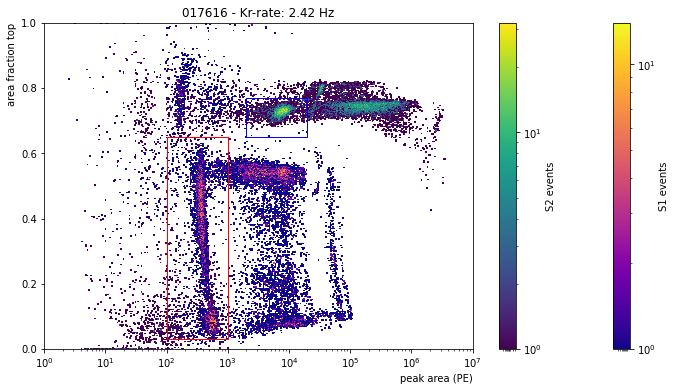

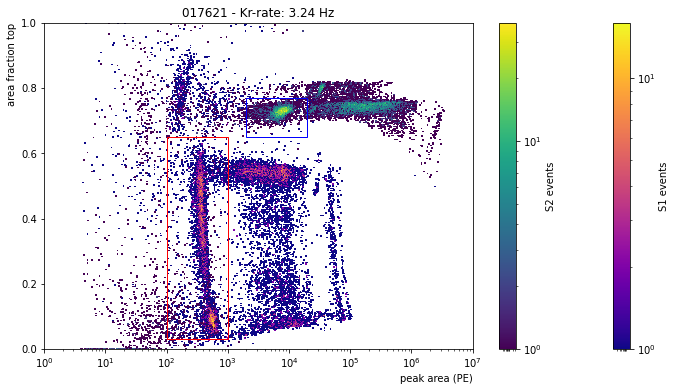

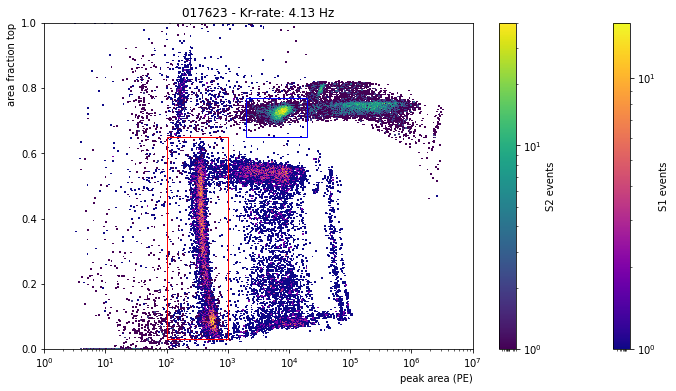

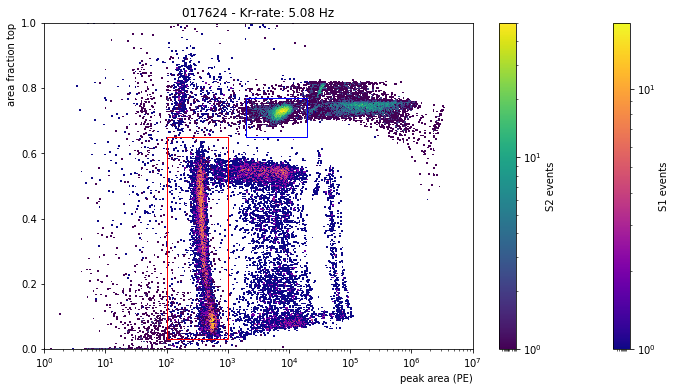

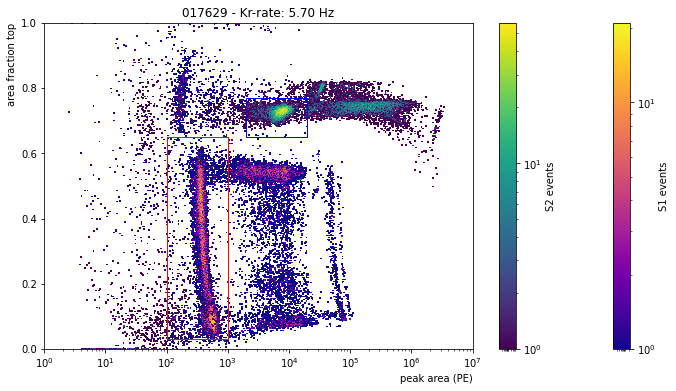

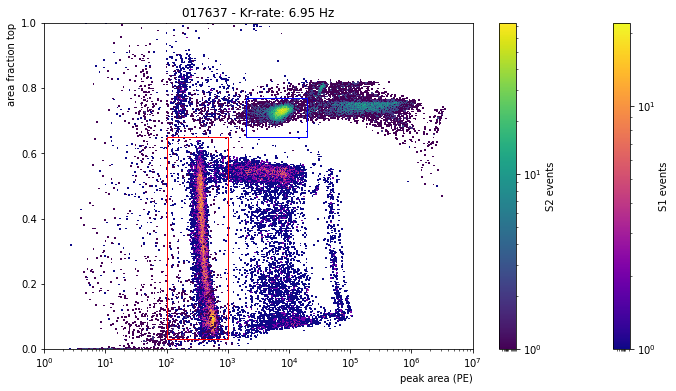

In [143]:
time, rate = plots_area_vs_aft(runs=['017604','017606','017607','017609','017610','017612',
                                     '017616','017621','017623','017624','017629','017637'])

In [33]:
def plot_area_width_aft_Kr(run_id, low = 0, high = 7, low2 = 0, high2 = 1, binning = 500,plot=False):
    events0 = st.get_df(run_id,'event_info_double',progress_bar=False)
    mask = ddu.mask_KrSingleS1(events0)
    livetime = (events0['time'][len(events0)-1]-events0['time'][0])/1e9
    events = events0[mask]
    ph_s1 = Histdd(events['s1_a_area'], events['s1_a_range_50p_area'],
                    bins=(np.logspace(low, high, binning), np.logspace(1, 6, binning)))
    ph_s2 = Histdd(events['s2_a_area'], events['s2_a_range_50p_area'],
                    bins=(np.logspace(low, high, binning), np.logspace(1, 6, binning)))
    phcs1 = Histdd(events['s1_a_area'], events['s1_a_area_fraction_top'],
                    bins=(np.logspace(low, high, binning), np.linspace(0, 1, binning)))
    phcs2 = Histdd(events['s2_a_area'], events['s2_a_area_fraction_top'],
                    bins=(np.logspace(low, high, binning), np.linspace(0, 1, binning)))
    #mask = (events['s1_area']>a1_b[0]) & (events['s1_area']<a1_b[1]) & (events['s2_area']>a2_b[0]) & (events['s2_area']<a2_b[1])
    rate = len(events)/livetime
    irate, itime, irr = [], [], []
    for i in range(10):
        idx1, idx2 = int(i*(len(events0)-1)/10), int((i+1)*(len(events0)-1)/10)
        ltime = (events0['time'][idx2]-events0['time'][idx1])/1e9
        trange = (events0['time']>events0['time'][idx1]) & (events0['time']<events0['time'][idx2])
        irate = np.append(irate,len(events0[mask & trange])/ltime)
        timestamp = events0['time'][idx1]/1e9
        itime = np.append(itime,datetime.fromtimestamp(timestamp))
        irr = np.append(irr,run_id)
    if plot:
        plt.figure(figsize=(12,6))
        ph_s1.plot(log_scale=True, cblabel='S1 events',cmap='plasma')
        ph_s2.plot(log_scale=True, cblabel='S2 events')
        plt.xlabel("peak area (PE)", ha='right', x=1)
        plt.ylabel("peak width 50% (ns)", ha='right', y=1)
        plt.title(f'run {run_id}')
        plt.xscale('log')
        plt.yscale('log')
        
        plt.figure(figsize=(12,6))
        ph_s1s2 = Histdd(events['s1_a_area'], events['s2_a_area'],
                        bins=(np.logspace(0, 5, binning), np.logspace(1, 7, binning)))
        ph_s1s2.plot(log_scale=True, cblabel='S2 events')
        plt.xlabel("S1 peak area (PE)", ha='right', x=1)
        plt.ylabel("S2 peak area (PE)", ha='right', y=1)
        plt.title(f'run {run_id}')
        plt.xscale('log')
        plt.yscale('log')
    
    plt.figure(figsize=(12,6))
    phcs1.plot(log_scale=True, cblabel='S1 events',cmap='plasma')
    phcs2.plot(log_scale=True, cblabel='S2 events')
    plt.xlabel("peak area (PE)", ha='right', x=1)
    plt.ylabel("area fraction top", ha='right', y=1)
    plt.title(f'run {run_id}')
    plt.xscale('log')
    plt.title(f'{run_id} - Kr-rate: {rate:.2f} Hz')
    plt.savefig(f'area_vs_aft_run{run_id}.png')
    
    print(f'run {run_id}, livetime {livetime:.2f} s, Kr-rate: {rate:.2f} Hz')
    return rate, irate, itime, irr

run 017645, livetime 1802.25 s, Kr-rate: 13.70 Hz


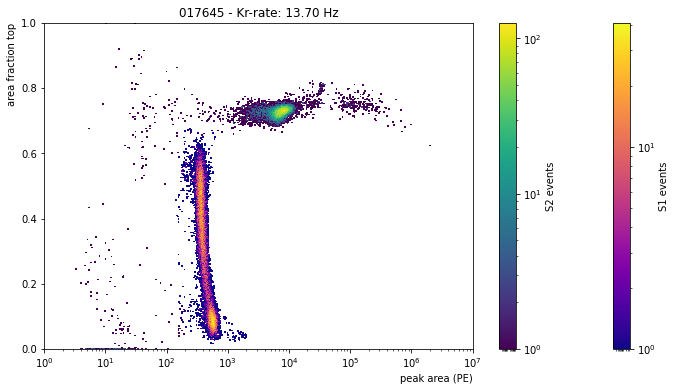

In [67]:
r, rr, tt, runs = plot_area_width_aft_Kr('017645',plot=0)

In [36]:
def plots_area_vs_aft(runs):
    time, rate, rrs = [], [], []
    for i, run in enumerate(runs):
        r, rr, tt, r1 = plot_area_width_aft_Kr(run,plot=0)
        time = np.append(time,tt)
        rate = np.append(rate,rr)
        rrs = np.append(rrs,r1)
    fp_in = f'area_vs_aft_run*.png'
    fp_out = f'area_vs_aft_run{runs[0]}-{runs[-1]}.gif'
    img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
    img.save(fp=fp_out, format='GIF', append_images=imgs,
             save_all=True, duration=500, loop=0)
    for i, run in enumerate(runs):
        os.remove(f'area_vs_aft_run{run}.png')
    return time, rate, rrs

run 017604, livetime 1801.61 s, Kr-rate: 0.21 Hz
run 017606, livetime 1800.02 s, Kr-rate: 0.27 Hz
run 017607, livetime 1801.50 s, Kr-rate: 0.43 Hz
run 017609, livetime 1801.89 s, Kr-rate: 0.76 Hz
run 017610, livetime 1801.85 s, Kr-rate: 1.24 Hz
run 017612, livetime 1800.09 s, Kr-rate: 1.89 Hz
run 017616, livetime 1800.53 s, Kr-rate: 2.64 Hz
run 017621, livetime 1802.83 s, Kr-rate: 3.44 Hz
run 017623, livetime 1800.82 s, Kr-rate: 4.31 Hz
run 017624, livetime 1800.93 s, Kr-rate: 5.18 Hz
run 017629, livetime 1801.31 s, Kr-rate: 5.83 Hz
run 017637, livetime 1800.74 s, Kr-rate: 6.93 Hz
run 017638, livetime 1801.06 s, Kr-rate: 7.29 Hz
run 017641, livetime 1801.28 s, Kr-rate: 7.84 Hz
run 017643, livetime 1800.29 s, Kr-rate: 9.98 Hz
run 017645, livetime 1802.25 s, Kr-rate: 13.70 Hz


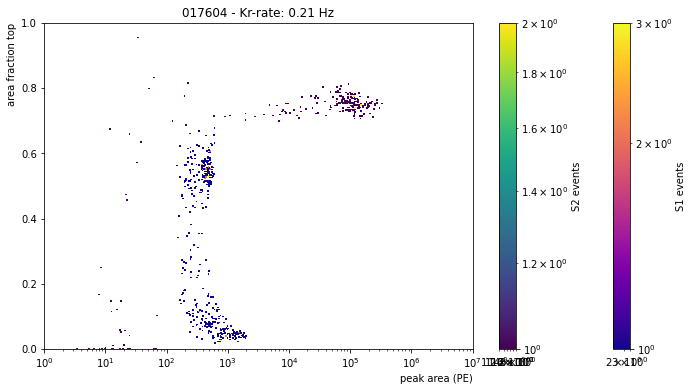

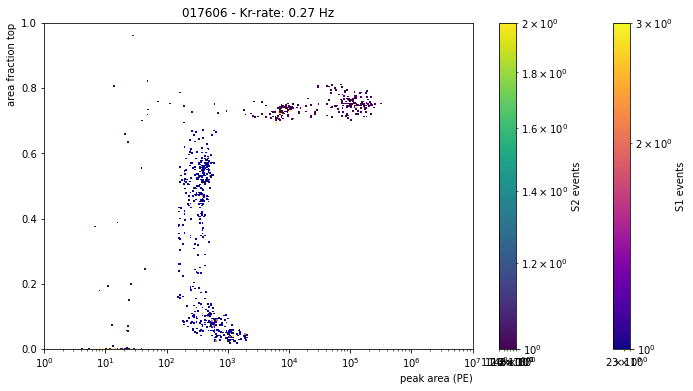

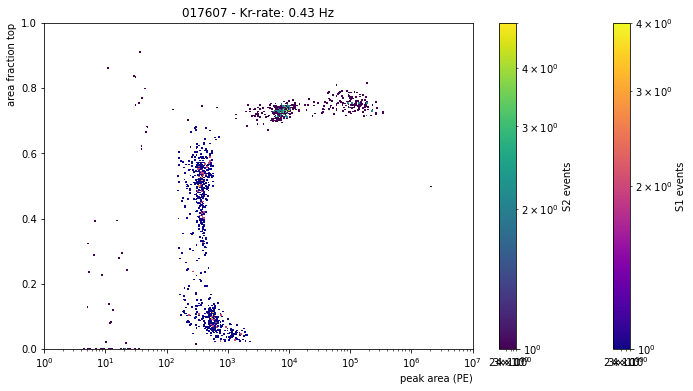

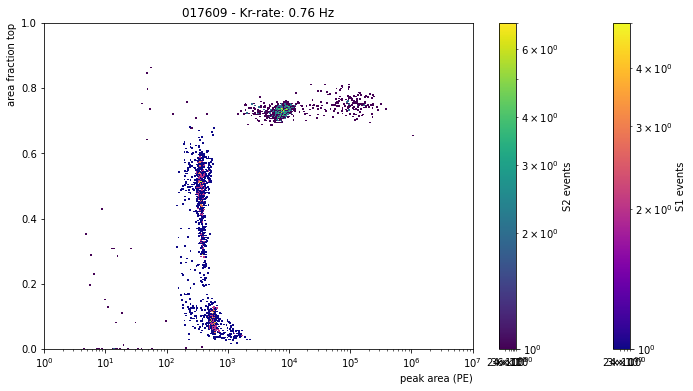

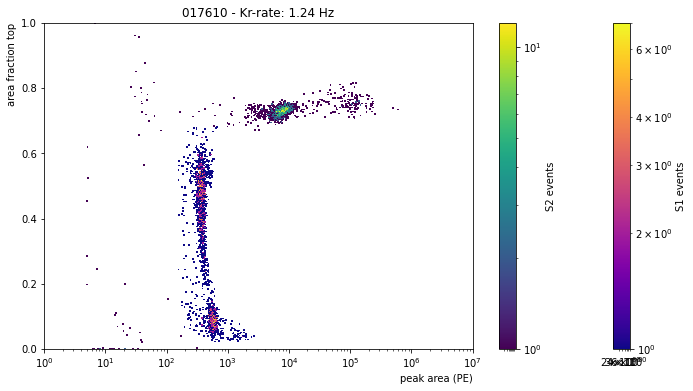

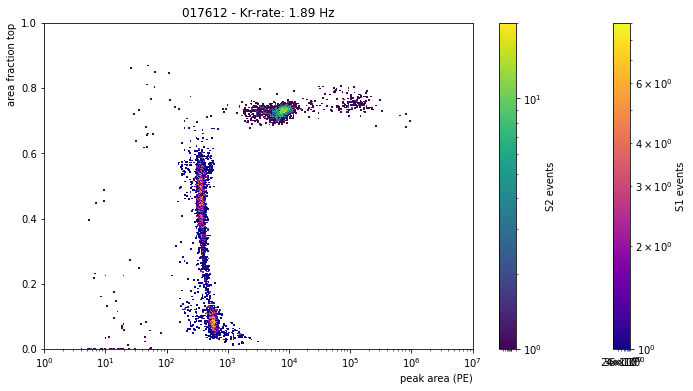

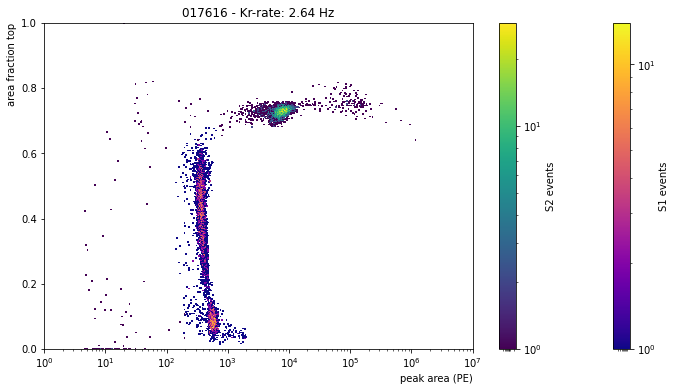

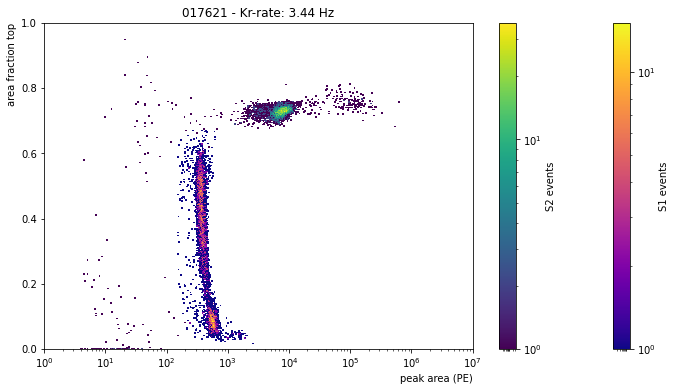

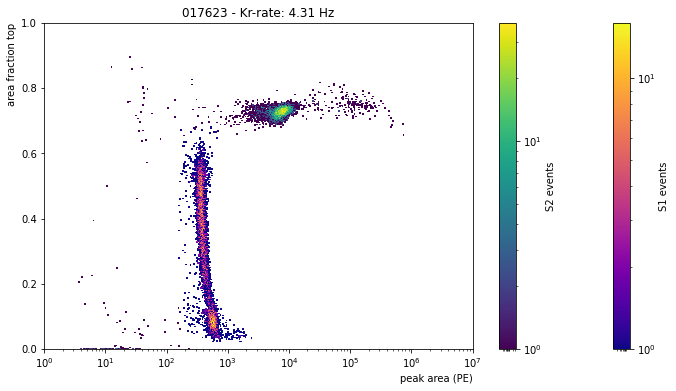

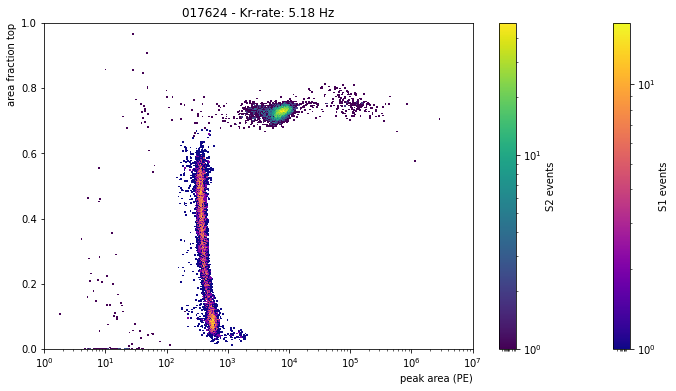

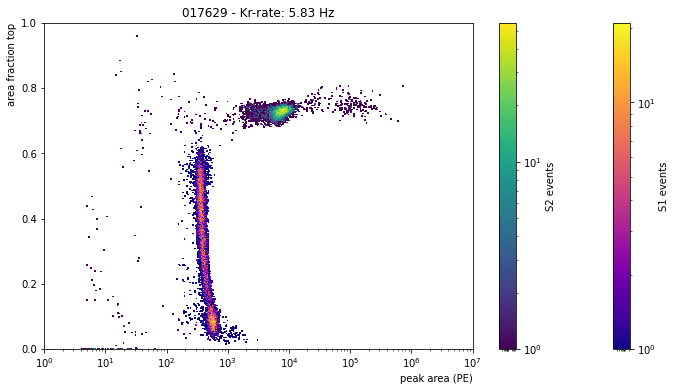

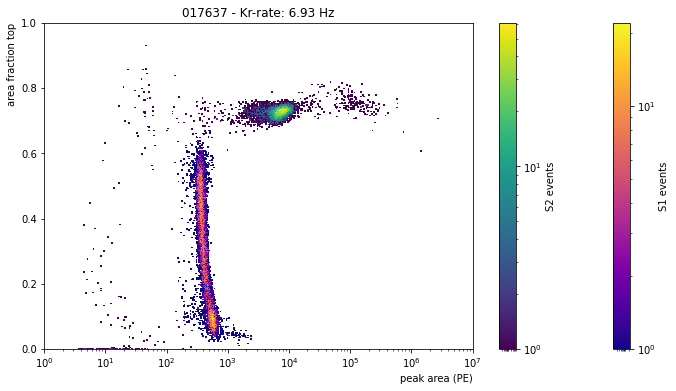

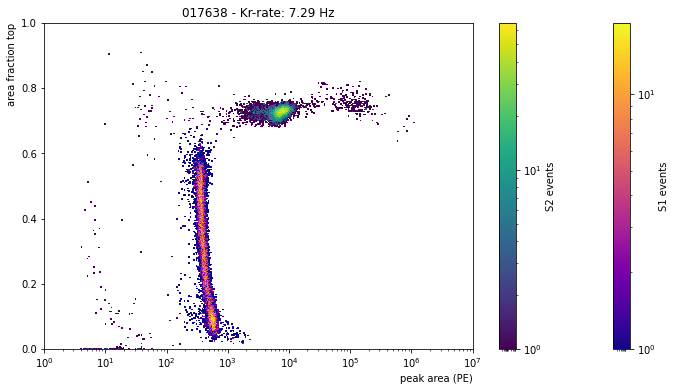

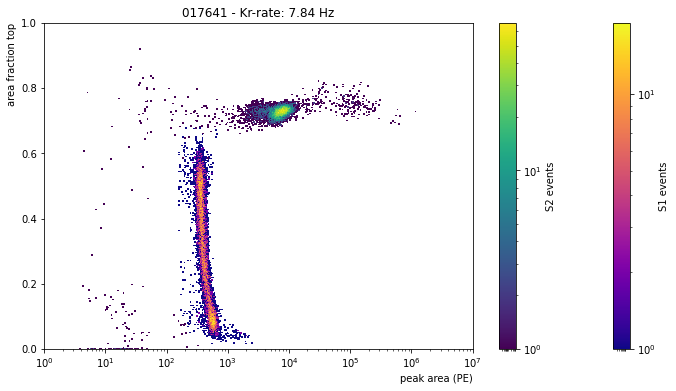

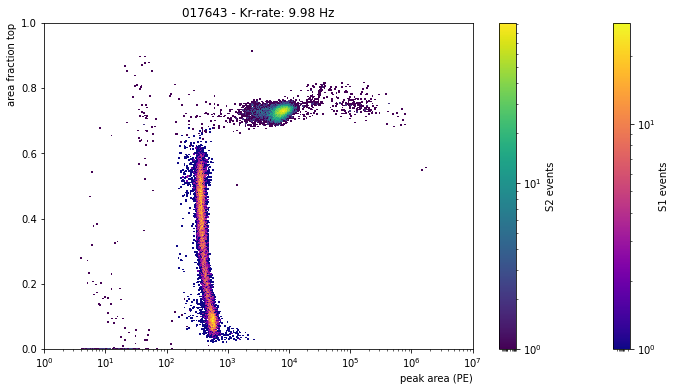

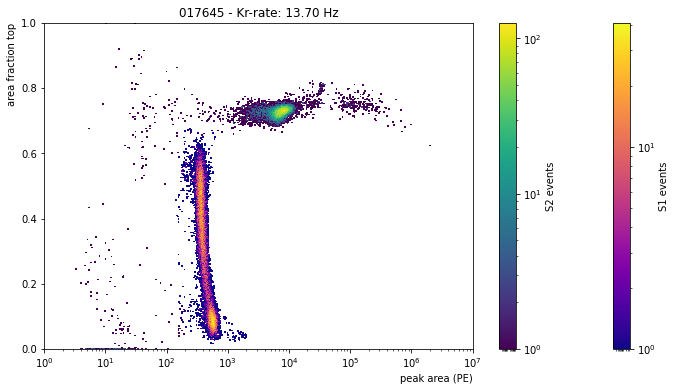

In [68]:
time, rate, runs = plots_area_vs_aft(runs=['017604','017606','017607','017609','017610','017612',
                                           '017616','017621','017623','017624','017629','017637',
                                           '017638','017641','017643','017645'])

Text(0, 1, 'Kr rate (Hz)')

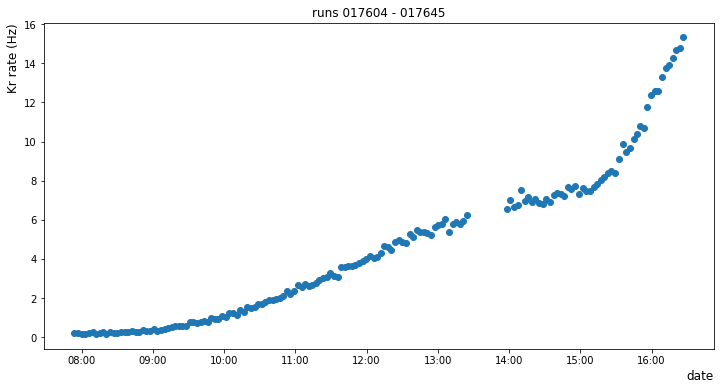

In [69]:
from datetime import datetime, timedelta
plt.figure(figsize=(12,6))
dates = matplotlib.dates.date2num(time + timedelta(hours=5))
plt.plot_date(dates, rate)
myFmt = matplotlib.dates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.title(f'runs {runs[0]} - {runs[-1]}')
plt.xlabel("date", ha='right', x=1,fontsize=12)
plt.ylabel("Kr rate (Hz)", ha='right', y=1,fontsize=12)